1. Conduct time series analysis. Plot the time series. Calculate the autocorrelation coefficients and build ACF and PACF and their correlograms for the original series. How do you think if the considered time series is stationary?
2. Determine an order of difference of the time series. To do this, build correlograms for the original series and the series in the first and second differences. Check the difference for the presence of a unit root using the Advanced Dickey-Fuller test (ADF-test). What is the order d of stationarity? 
3. Do the difference series have any significant coefficients of autocorrelation and partial autocorrelation? Determine the order of the model ARIMA (p, d, q) taking into account the behavior of ACF and PACF.
4. Construct ARIMA (p, d, q)-model of the order selected in item 3.
5. Explore the residuals of the constructed model. Are there any elements in the model that are not taken into account? If the residuals series has autocorrelation for low order members (no more than 3), then try to fix the problem by adding autoregressive elements or moving average ones into the model.
6. Does the time series contain a seasonal component? If it does, what is a lag of the seasonal cycle? Take the corresponding seasonal difference. 
7. Add to the constructed model seasonal elements (P, D, Q).
8. Explore the residuals of the constructed model SARIMA(p,d,q)(P,D,Q)s, where s is the length of the seasonal cycle. In case the residuals are not the "white" noise, please, modify the model.
9. Construct a histogram of residuals for the final model. Perform the test for normality of residuals (for example, the Shapiro-Wilk test or the Kolmogorov-Smirnov test).
10. Make sure that the residuals series is the "white" noise. Check the residuals for stationarity using the Ljung-Box Q-test. 
11. Using the final model perform a forecast for 18 periods forward. Draw graphs for initial, modeling, and predictive values and 95% confidence interval.
12. Using the method of exhaustive search of the model parameters, form a set of SARIMA models with different parameters and choose the "best" model based on AIC and SBC criteria. Compare this model with the one you built on previous steps by your own intuition. Make a forecast forward for 18 time periods. Compare two forecasts.


1. 进行时间序列分析。绘制时间序列。计算自相关系数并为原始序列构建 ACF 和 PACF 及其相关图。您如何看待所考虑的时间序列是否平稳？
2. 确定时间序列的差序。为此，请为原始系列以及一阶和二阶差异中的系列构建相关图。使用高级 Dickey-Fuller 检验（ADF 检验）检查是否存在单位根的差异。平稳的阶数 d 是多少？
3. 差异序列是否存在显着的自相关和偏自相关系数？考虑 ACF 和 PACF 的行为，确定模型 ARIMA (p, d, q) 的阶数。
4. 构建第 3 项中选择的订单的 ARIMA (p, d, q)-模型。
5. 探索构建模型的残差。模型中是否有任何未考虑的元素？如果残差序列对低阶成员（不超过 3 个）具有自相关性，则尝试通过在模型中添加自回归元素或移动平均元素来解决问题。
6. 时间序列是否包含季节性成分？如果是，那么季节性周期的滞后是多少？取相应的季节差。
7. 向构建的模型添加季节性元素（P、D、Q）。
8. 探索构建的模型 SARIMA(p,d,q)(P,D,Q)s 的残差，其中 s 是季节周期的长度。如果残差不是“白”噪声，请修改模型。
9. 为最终模型构建残差直方图。执行残差正态性检验（例如，Shapiro-Wilk 检验或 Kolmogorov-Smirnov 检验）。
10. 确保残差系列是“白”噪声。使用 Ljung-Box Q 检验检查残差的平稳性。
11. 使用最终模型对未来 18 个周期进行预测。绘制初始值、建模值和预测值以及 95% 置信区间的图表。
12. 采用模型参数穷举搜索的方法，形成一组不同参数的SARIMA模型，并根据AIC和SBC准则选择“最佳”模型。将此模型与您根据自己的直觉在先前步骤中构建的模型进行比较。对 18 个时间段进行预测。比较两个预测。

# Step 1：Conduct time series analysis. Plot the time series. Calculate the autocorrelation coefficients and build ACF and PACF and their correlograms for the original series. How do you think if the considered time series is stationary?

## The link of data https://data.stats.gov.cn/easyquery.htm?cn=C01
 This data is come from Tht Center of Statistic of China. It shows the Incomes of Fiance of Chinese Goverment.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('FiancInco_CN.csv')

In [3]:
data.head()

,Year,Incomes,Rates(%)
0,2018/12/1,183352.0,6.2
1,2019/1/1,NaN,NaN
2,2019/2/1,39104.0,7.0
3,2019/3/1,53656.0,6.2
4,2019/4/1,72651.0,5.3


In [4]:
df = pd.DataFrame(data,index = np.array([i for i in range(36)]))

In [5]:
df.head(37)

,Year,Incomes,Rates(%)
0,2018/12/1,183352.0,6.2
1,2019/1/1,NaN,NaN
2,2019/2/1,39104.0,7.0
3,2019/3/1,53656.0,6.2
4,2019/4/1,72651.0,5.3
5,2019/5/1,89919.0,3.8
6,2019/6/1,107846.0,3.4
7,2019/7/1,125623.0,3.1
8,2019/8/1,137061.0,3.2
9,2019/9/1,150678.0,3.3


In [6]:
df['Incomes'].fillna(df['Incomes'].mean(),inplace = True)#用平均数替代空值

In [7]:
df.head(36)

,Year,Incomes,Rates(%)
0,2018/12/1,183352.000000,6.2
1,2019/1/1,118868.251515,NaN
2,2019/2/1,39104.000000,7.0
3,2019/3/1,53656.000000,6.2
4,2019/4/1,72651.000000,5.3
5,2019/5/1,89919.000000,3.8
6,2019/6/1,107846.000000,3.4
7,2019/7/1,125623.000000,3.1
8,2019/8/1,137061.000000,3.2
9,2019/9/1,150678.000000,3.3


## Plot the time series

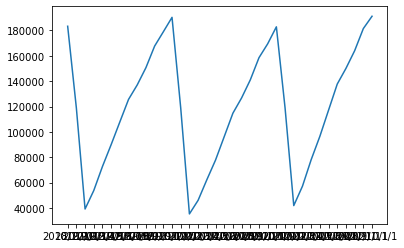

In [8]:
plt.plot(data['Year'],data['Incomes'])

plt.show()


## Calculate the autocorrelation coefficients

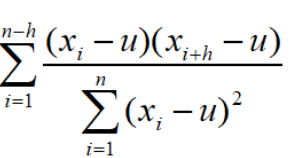

In [35]:
def getAutocor(timeSeries,h): #求acf
    #h is a Lag number
    l = len(timeSeries)
    
    tS_mean = timeSeries.mean()
    tS_var = np.array([i**2 for i in [timeSeries-tS_mean]]).sum()
    autocor = 0
    for i in range(l-h):
        autocor = autocor + (timeSeries.loc[i]-tS_mean)*(timeSeries.loc[i+h]-tS_mean)/tS_var
#     autocor = pd.DataFrame(autocor，columns = ['result'])
#     return 'The autocorrelation coefficients is: {}'.format(autocor[0,0])
    return autocor
# type(autocor)
def cgetAutocor(timeSeries):#循环求acf
    l = len(timeSeries)
    a = []
    for i in range(l):
        a.append(getAutocor(timeSeries,i))
    return a

In [27]:
#Test
a = [2,3,4,3,7]
af = pd.DataFrame(a)
getAutocor(af,1)

0   -0.097297
dtype: float64

In [36]:
cgetAutocor(af)

[0    1.0
 dtype: float64,
 0   -0.097297
 dtype: float64,
 0    0.062162
 dtype: float64,
 0   -0.075676
 dtype: float64,
 0   -0.389189
 dtype: float64]

In [38]:
from statsmodels.tsa.stattools import acf
acf(af,2)

array([ 1.        , -0.12162162,  0.1036036 , -0.18918919, -1.94594595])

In [12]:
df.head()

,Year,Incomes,Rates(%)
0,2018/12/1,183352.000000,6.2
1,2019/1/1,118868.251515,NaN
2,2019/2/1,39104.000000,7.0
3,2019/3/1,53656.000000,6.2
4,2019/4/1,72651.000000,5.3


In [40]:
Autocors = []
for i in range(20):
    print('if h = {}'.format(i))
    print(getAutocor(df['Incomes'],i))
    a = getAutocor(df['Incomes'],i)
    Autocors.append(a)
print(Autocors)
# type(df['Income(100 million yuan)'])

if h = 0
1.0
if h = 1
0.697030389294245
if h = 2
0.23653660036813318
if h = 3
-0.08449317637131298
if h = 4
-0.3229815262834112
if h = 5
-0.4691906169766378
if h = 6
-0.5163105003523519
if h = 7
-0.4780998830541755
if h = 8
-0.3504968599531127
if h = 9
-0.10950695355117168
if h = 10
0.22483911010101257
if h = 11
0.5365292630465051
if h = 12
0.6393242743841763
if h = 13
0.4141723341620668
if h = 14
0.10535669784862445
if h = 15
-0.08728758104454523
if h = 16
-0.2272476735066662
if h = 17
-0.3109278362212969
if h = 18
-0.3295244749223498
if h = 19
-0.2956537864081012
[1.0, 0.697030389294245, 0.23653660036813318, -0.08449317637131298, -0.3229815262834112, -0.4691906169766378, -0.5163105003523519, -0.4780998830541755, -0.3504968599531127, -0.10950695355117168, 0.22483911010101257, 0.5365292630465051, 0.6393242743841763, 0.4141723341620668, 0.10535669784862445, -0.08728758104454523, -0.2272476735066662, -0.3109278362212969, -0.3295244749223498, -0.2956537864081012]


In [52]:
acf(df['Incomes'])

array([ 1.        ,  0.69703039,  0.2365366 , -0.08449318, -0.32298153,
       -0.46919062, -0.5163105 , -0.47809988, -0.35049686, -0.10950695,
        0.22483911,  0.53652926,  0.63932427,  0.41417233,  0.1053567 ,
       -0.08728758, -0.22724767, -0.31092784, -0.32952447, -0.29565379,
       -0.21106778, -0.05704602,  0.15221133,  0.30778245,  0.32444673,
        0.18470157,  0.03306081, -0.03210454, -0.08204107, -0.11899849,
       -0.12951592, -0.1206501 , -0.09468833, -0.03517276,  0.04965346,
        0.05736088])

## Plot ACF and PACF

D:\Dev\Anaconda\envs\snakes\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


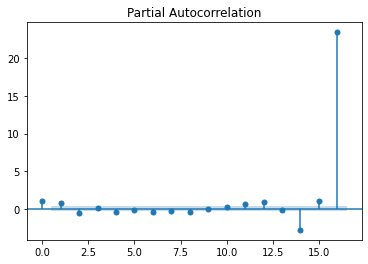

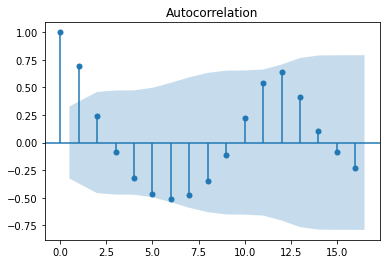

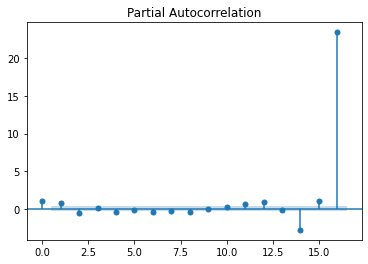

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Incomes'])
plot_pacf(df['Incomes'])`

## How do you think if the considered time series is stationary?

根据时序图，很明显可以看到，这个时间序列是平稳的。ACF是拖尾，PACF

# Step 2：Determine an order of difference of the time series. To do this, build correlograms for the original series and the series in the first and second differences. Check the difference for the presence of a unit root using the Advanced Dickey-Fuller test (ADF-test). What is the order d of stationarity?

确定时间序列的差序。为此，请为原始系列以及一阶和二阶差异中的系列构建相关图。使用高级 Dickey-Fuller 检验（ADF 检验）检查是否存在单位根的差异。平稳的阶数 d 是多少？

# 笔记：第一问中，我找的数据是平稳的，不合适，应该找一个不平稳的数据，然后通过差分，使其平稳，最后在这一步中求得差分阶数。

In [56]:
df.head()

,Year,Incomes,Rates(%)
0,2018/12/1,183352.000000,6.2
1,2019/1/1,118868.251515,NaN
2,2019/2/1,39104.000000,7.0
3,2019/3/1,53656.000000,6.2
4,2019/4/1,72651.000000,5.3


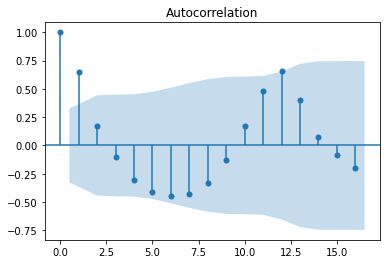

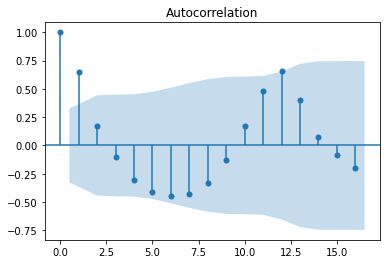

In [61]:
plot_acf(np.log(df['Incomes']))

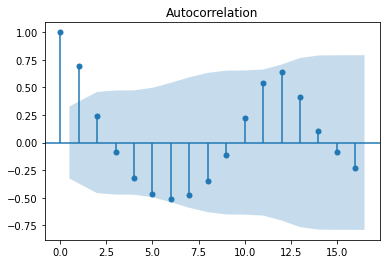

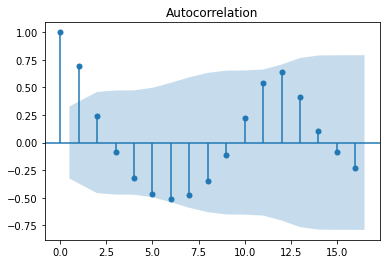

In [63]:
plot_acf(df['Incomes'])

D:\Dev\Anaconda\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
D:\Dev\Anaconda\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
D:\Dev\Anaconda\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
D:\Dev\Anaconda\envs\snakes\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsm

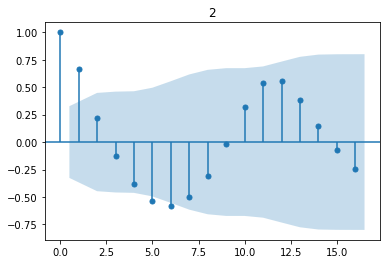

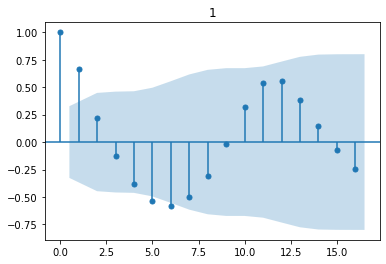

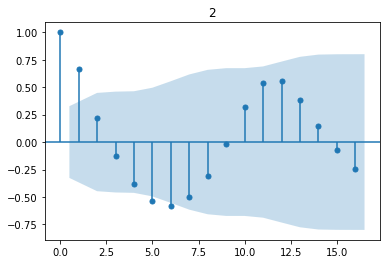

In [70]:
plot_acf(acf(df['Incomes'],1),title = 1)
plot_acf(acf(df['Incomes'],2),title = 2)